# Fall / Non Fall Classification

# Make Training and Testing Dataset

In [1]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import ensemble
import xgboost as xgb
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

#Random values generated should be same everytime the program is run
np.random.seed(7)

#Reading of Training and Testing Data from CSV File
data=pd.read_csv("Dataset.csv")
train=data.iloc[0:480,:]
test=data.iloc[480:,:]
print("(Rows, Columns) in training dataset",train.shape)
print("Number of Features in training dataset:-",train.shape[1])
print("Number of Features in testing dataset:-",test.shape[1])

/home/inderpreet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(Rows, Columns) in training dataset (480, 136)
Number of Features in training dataset:- 136
Number of Features in testing dataset:- 136


# Feature Engineering
Replace NaN values with minimun of that column

In [2]:
#Transforming Columns containg "NaN" Values
#in both training and testing dataset
for col in train.columns:
    val = train[col].min()
    train[col]=train[col].fillna(value=val,axis=0)

for col in test.columns:
    val = test[col].min()
    test[col]=test[col].fillna(value=val,axis=0)

/home/inderpreet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/inderpreet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Make Train and Test Dataframes

In [3]:
#Separating training data Features and Predictions into different dataframes
X_train=train.drop('class_label',axis=1)
Y_train=train['class_label']

#Separating testing data Features and Predictions into different dataframes
X_test=test.drop('class_label',axis=1)
Y_test=test['class_label']

# Feature Exploration

/home/inderpreet/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


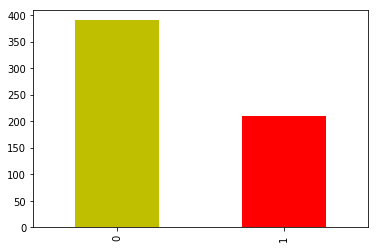

In [4]:
data.class_label.value_counts().plot(kind='bar',colors='YR')

# Feature Selection
### Remove Low Variance Features

In [5]:
#Performing Feature Selection on Training Dataset
print("Number of Features in training dataset(before feature selection by Variance Threshold):-",X_train.shape[1])
X_train_temp = X_train.copy(deep=True)  # Make a deep copy of the Training Data dataframe
selector = VarianceThreshold(0.12)
selector.fit(X_train_temp)
X_res = X_train_temp.loc[:, selector.get_support(indices=False)]
X_train=X_res
print("Number of Features in training dataset(after feature selection by Variance Threshold):-",X_train.shape[1])

Number of Features in training dataset(before feature selection by Variance Threshold):- 135
Number of Features in training dataset(after feature selection by Variance Threshold):- 127


### Correlation between each feature and class variable.

Find most important features relative to target through correlation


/home/inderpreet/anaconda3/lib/python3.6/site-packages/pandas/plotting/_core.py:179: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


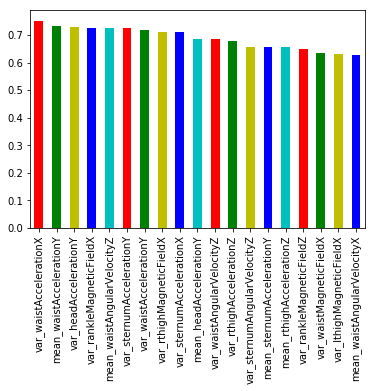

In [6]:

traini = pd.concat([X_train, Y_train], axis=1, join='inner')

# Find most important features relative to target i.e finding correlation of every individual feature i.e independent variable with dependent variable and then sorting them and using the features that have maximum correlation
print("Find most important features relative to target through correlation")
corr = traini.corr()
corr.sort_values(["class_label"], ascending = False, inplace = True)

#Selecting top-20 features
corr.class_label[1:20].plot(kind='bar',colors='RGYBC')
top_features=corr.class_label[1:20].to_frame()

# Top 20 Features

In [7]:
features=[]
columns=top_features.index
for col in columns:
    features.append(col)
print(features)

['var_waistAccelerationX', 'mean_waistAccelerationY', 'var_headAccelerationY', 'var_rankleMagneticFieldX', 'mean_waistAngularVelocityZ', 'var_sternumAccelerationY', 'var_waistAccelerationY', 'var_rthighMagneticFieldX', 'var_sternumAccelerationX', 'mean_headAccelerationY', 'var_waistAngularVelocityZ', 'var_rthighAccelerationZ', 'var_sternumAngularVelocityZ', 'mean_sternumAccelerationY', 'mean_rthighAccelerationZ', 'var_rankleMagneticFieldZ', 'var_waistMagneticFieldX', 'var_lthighMagneticFieldX', 'mean_waistAngularVelocityX']


# Select same features in Training and Testing Dataset

In [8]:
#Selecting Features for training dataset
X_train=X_train[features]
print(X_train.shape[1])
print(X_train.columns)

#Selecting Same Features for testing dataset
X_test=X_test[X_train.columns]
print(X_test.shape[1])
print(X_test.columns)


19
Index(['var_waistAccelerationX', 'mean_waistAccelerationY',
       'var_headAccelerationY', 'var_rankleMagneticFieldX',
       'mean_waistAngularVelocityZ', 'var_sternumAccelerationY',
       'var_waistAccelerationY', 'var_rthighMagneticFieldX',
       'var_sternumAccelerationX', 'mean_headAccelerationY',
       'var_waistAngularVelocityZ', 'var_rthighAccelerationZ',
       'var_sternumAngularVelocityZ', 'mean_sternumAccelerationY',
       'mean_rthighAccelerationZ', 'var_rankleMagneticFieldZ',
       'var_waistMagneticFieldX', 'var_lthighMagneticFieldX',
       'mean_waistAngularVelocityX'],
      dtype='object')
19
Index(['var_waistAccelerationX', 'mean_waistAccelerationY',
       'var_headAccelerationY', 'var_rankleMagneticFieldX',
       'mean_waistAngularVelocityZ', 'var_sternumAccelerationY',
       'var_waistAccelerationY', 'var_rthighMagneticFieldX',
       'var_sternumAccelerationX', 'mean_headAccelerationY',
       'var_waistAngularVelocityZ', 'var_rthighAccelerationZ',
  

# Applying Models and Comparing them

In [9]:
# Creating training and cross-validation dataset
X_train,X_CV,Y_train,Y_CV=train_test_split(X_train,Y_train,test_size=0.30)


import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
results_sensitivity={}
results_specitivity={}

# Logistic Regression

Sensitivity- 97.2222222222 Specificity 100.0
Error Rate:
False Positive Rate- 0.0 True Positive Rate- 2.77777777778
Confusion matrix, without normalization
[[108   0]
 [  1  35]]
Normalized confusion matrix
[[ 1.          0.        ]
 [ 0.02777778  0.97222222]]


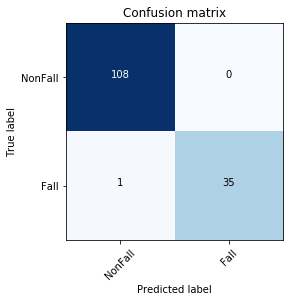

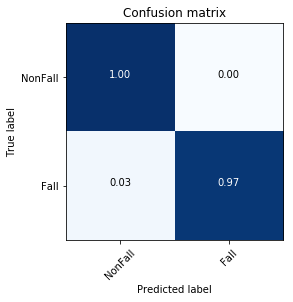

In [10]:
from sklearn.metrics import roc_curve

# Applying Logistic Regression
log_reg=LogisticRegression()
log_reg=log_reg.fit(X_train, Y_train)
log_pred=log_reg.predict(X_CV)
score=accuracy_score(Y_CV,log_pred)
#print(score)

tn, fp, fn, tp  = confusion_matrix(Y_CV, log_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['Logistic']=sensitivity
results_specitivity['Logistic']=specificity

cm=confusion_matrix(Y_CV,log_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Decision Tree

Sensitivity- 77.7777777778 Specificity 98.1481481481
Error Rate:
False Positive Rate- 1.85185185185 True Positive Rate- 22.2222222222
Confusion matrix, without normalization
[[106   2]
 [  8  28]]
Normalized confusion matrix
[[ 0.98148148  0.01851852]
 [ 0.22222222  0.77777778]]


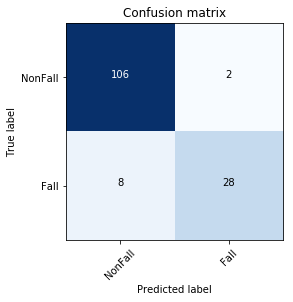

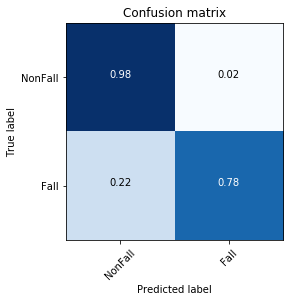

In [11]:
# Applying Decision Tree
decision_reg = DecisionTreeClassifier(criterion='gini',
                                            max_depth=10, max_leaf_nodes=23, splitter='best')
decision_reg=decision_reg.fit(X_train, Y_train)
decision_pred=decision_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, decision_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['DT']=sensitivity
results_specitivity['DT']=specificity

cm=confusion_matrix(Y_CV,decision_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Gaussian Naive Bayes

Sensitivity- 97.2222222222 Specificity 96.2962962963
Error Rate:
False Positive Rate- 3.7037037037 True Positive Rate- 2.77777777778
Confusion matrix, without normalization
[[104   4]
 [  1  35]]
Normalized confusion matrix
[[ 0.96296296  0.03703704]
 [ 0.02777778  0.97222222]]


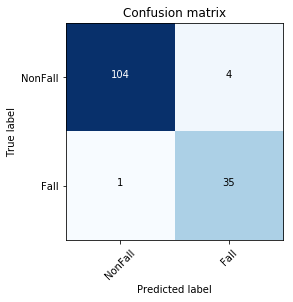

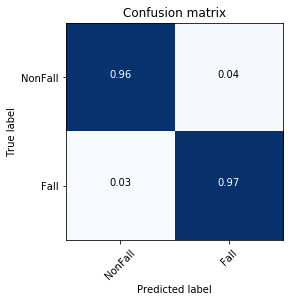

In [12]:
# Applying Gaussian Naive Bayes
naivebay_reg = GaussianNB()
naivebay_reg=naivebay_reg.fit(X_train, Y_train)
naivebay_pred=naivebay_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, naivebay_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['NB']=sensitivity
results_specitivity['NB']=specificity

cm=confusion_matrix(Y_CV,naivebay_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Support Vector Machines

Sensitivity- 0.0 Specificity 100.0
Error Rate:
False Positive Rate- 0.0 True Positive Rate- 100.0
Confusion matrix, without normalization
[[108   0]
 [ 36   0]]
Normalized confusion matrix
[[ 1.  0.]
 [ 1.  0.]]


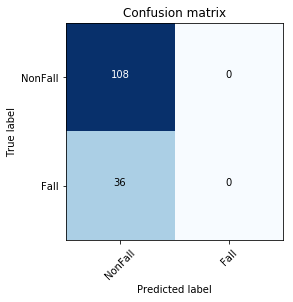

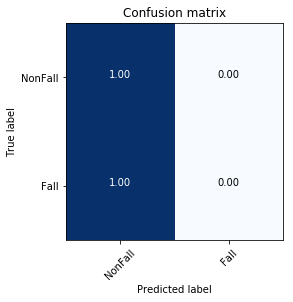

In [13]:
# Applying Support Vector Machines
svm_reg = SVC()
svm_reg=svm_reg.fit(X_train, Y_train)
svm_pred=svm_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, svm_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

cm=confusion_matrix(Y_CV,svm_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Adaboost Classifier

Sensitivity- 94.4444444444 Specificity 99.0740740741
Error Rate
False Positive Rate- 0.925925925926 True Positive Rate- 5.55555555556
Confusion matrix, without normalization
[[107   1]
 [  2  34]]
Normalized confusion matrix
[[ 0.99074074  0.00925926]
 [ 0.05555556  0.94444444]]


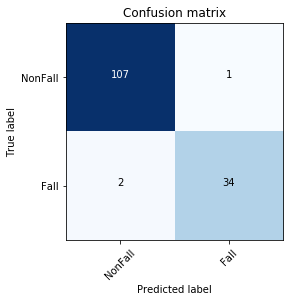

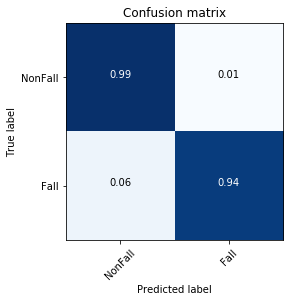

In [14]:
# Applying AdaBoost Classifier
ada_reg = AdaBoostClassifier(random_state=2, n_estimators=500)
ada_reg=ada_reg.fit(X_train, Y_train)
ada_pred=ada_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, ada_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['Adaboost']=sensitivity
results_specitivity['Adaboost']=specificity

cm=confusion_matrix(Y_CV,ada_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Gradient Boosting Classifier

Sensitivity- 86.1111111111 Specificity 100.0
Error Rate:
False Positive Rate- 0.0 True Positive Rate- 13.8888888889
Confusion matrix, without normalization
[[108   0]
 [  5  31]]
Normalized confusion matrix
[[ 1.          0.        ]
 [ 0.13888889  0.86111111]]


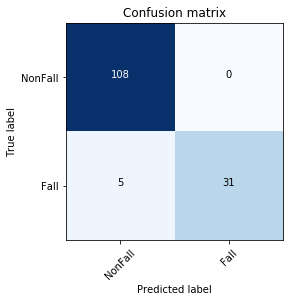

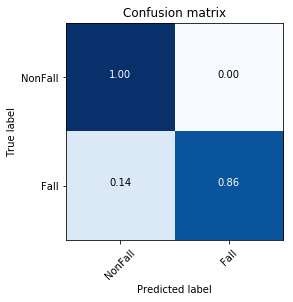

In [15]:
# Applying Gradient Boosting Classifier
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2, 'learning_rate': 0.01}
gb_reg = ensemble.GradientBoostingClassifier(**params)
gb_reg=gb_reg.fit(X_train, Y_train)
gb_pred=gb_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, gb_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['GBT']=sensitivity
results_specitivity['GBT']=specificity

cm=confusion_matrix(Y_CV,gb_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Random Forest Classifier

Sensitivity- 83.3333333333 Specificity 99.0740740741
Error Rate:
False Positive Rate- 0.925925925926 True Positive Rate- 16.6666666667
Confusion matrix, without normalization
[[107   1]
 [  6  30]]
Normalized confusion matrix
[[ 0.99074074  0.00925926]
 [ 0.16666667  0.83333333]]


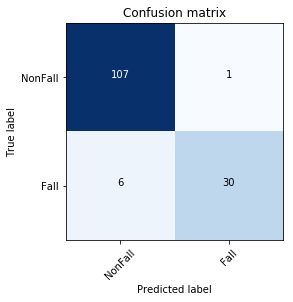

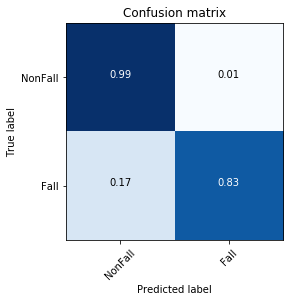

In [16]:
# Applying Random Forest Classifier
rf_reg = RandomForestClassifier(random_state=1)
rf_reg=rf_reg.fit(X_train, Y_train)
rf_pred=rf_reg.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, rf_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['RForest']=sensitivity
results_specitivity['RForest']=specificity

cm=confusion_matrix(Y_CV,rf_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

# Majority Voting

Sensitivity- 91.6666666667 Specificity 99.0740740741
Error Rate:
False Positive Rate- 0.925925925926 True Positive Rate- 8.33333333333
Confusion matrix, without normalization
[[107   1]
 [  3  33]]
Normalized confusion matrix
[[ 0.99074074  0.00925926]
 [ 0.08333333  0.91666667]]


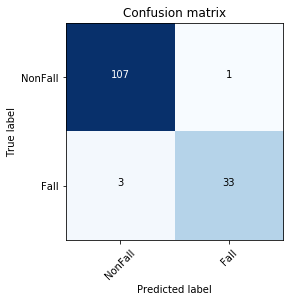

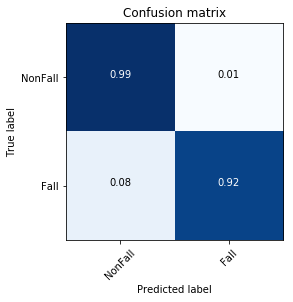

In [17]:
#Applying Majority Voting Concept
majority_class = VotingClassifier(estimators=[('lr', ada_reg),
                                    ('gnb', gb_reg),('naive_bayes',naivebay_reg)],
                                    voting='hard')
majority_class = majority_class.fit(X_train, Y_train)
majority_pred=majority_class.predict(X_CV)

tn, fp, fn, tp  = confusion_matrix(Y_CV, majority_pred, labels=[0, 1]).ravel()
sensitivity=tp/(tp+fn)
specificity=tn/(tn+fp)
print("Sensitivity-",sensitivity*100,"Specificity",specificity*100)
print("Error Rate:")
fpr=fp/(fp+tn)
tpr=fn/(fn+tp)
print("False Positive Rate-",fpr*100,"True Positive Rate-",tpr*100)

results_sensitivity['MVoting']=sensitivity
results_specitivity['MVoting']=specificity

cm=confusion_matrix(Y_CV,majority_pred,labels=[0,1])
classes=["NonFall","Fall"]
plt.figure()
plot_confusion_matrix(cm,classes)
plt.figure()
plot_confusion_matrix(cm,classes,normalize=True)
plt.show()

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
results = []
names = []
kfold = KFold(n_splits=5, random_state=22)


#5 KFold CrossValidation
cv=KFold(5)
# Select the optimal percentage of features with grid search
cvmodel = GridSearchCV(models, kfold,cv=cv)
cvmodel.fit(X_train,y_train)

for name,model in models:    
    cv_result = cross_val_score(model,X_train,Y_train, cv = kfold,scoring = 'f1')
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

plt.title('Comparing Models')
plt.ylabel('CV Score')
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

TypeError: 'KFold' object is not iterable

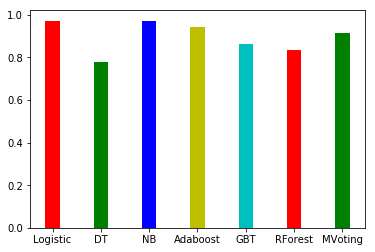

In [21]:
plt.bar(range(len(results_sensitivity)), list(results_sensitivity.values()),color='RGBYC',width=0.3)
plt.xticks(range(len(results_sensitivity)), list(results_sensitivity.keys()))
plt.show()

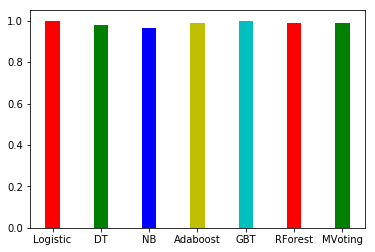

In [22]:
plt.bar(range(len(results_specitivity)), list(results_specitivity.values()),color='RGBYC',width=0.3)
plt.xticks(range(len(results_specitivity)), list(results_specitivity.keys()))
plt.show()